In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Train.csv")
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,24-03-2022,GO FIRST,G8,7559,15:30,Bangalore,02h 30m,non-stop,18:00,Kolkata,"3,845"
1,08-03-2022,GO FIRST,G8,395,08:10,Bangalore,08h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,16:35,Delhi,"4,028"
2,22-02-2022,Air India,AI,868,18:00,Delhi,16h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:55,Chennai,"11,520"
3,23-02-2022,Indigo,6E,438,18:50,Hyderabad,01h 15m,non-stop,20:05,Chennai,"4,453"
4,26-02-2022,Vistara,UK,816,11:30,Bangalore,08h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:05,Mumbai,"7,212"
...,...,...,...,...,...,...,...,...,...,...,...
165414,12-02-2022,Indigo,6E,599,11:25,Kolkata,02h 25m,non-stop,13:50,Delhi,"12,894"
165415,19-02-2022,Vistara,UK,818,19:40,Bangalore,12h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:35,Kolkata,"12,544"
165416,10-03-2022,Vistara,UK,706,10:15,Kolkata,08h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:20,Mumbai,"8,579"
165417,21-03-2022,Indigo,6E,2516,16:30,Kolkata,07h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:30,Hyderabad,"4,367"


In [3]:
def process_stops(src):
    stops, *other = src.split()
    stops = ''.join(list(filter(lambda y: y.isdigit(), src)))
    if len(stops) == 0:
        stops = '0'

    # if len(stops) > 1:
    #     print(stops, other[1:])

    return pd.Series((int(stops), ' '.join(other[1:])))

df[['stop_count', 'stop_country']] = df['stop'].apply(process_stops)
df['price'] = df['price'].apply(lambda x: int(x.replace(',', '')))

def convert_time_taken(src):
    h, m = src.split()
    h = ''.join(list(filter(lambda x: x.isdigit() or x in ('.'), h)))
    m = ''.join(list(filter(lambda x: x.isdigit() or x in ('.'), m)))
    if len(m) == 0:
        m = '0'
    return int(float(h) * 60 + float(m))

df['time_taken'] = df['time_taken'].apply(convert_time_taken)

def convert_dep_arr(src):
    # print(src)
    h, m = src.split(':')
    return int(h) * 60 + int(m)

df['dep_time'] = df['dep_time'].apply(convert_dep_arr)
df['arr_time'] = df['arr_time'].apply(convert_dep_arr)

In [4]:
df = df.drop('stop', axis=1)

In [5]:
def test_func(x):
    # print(x)
    return f'{x[0]}-{x[1]}'
df['from_to_merged'] = df[['from', 'to']].apply(test_func, axis=1)

/tmp/ipykernel_20251/1779102067.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return f'{x[0]}-{x[1]}'


In [6]:
df

,date,airline,ch_code,num_code,dep_time,from,time_taken,arr_time,to,price,stop_count,stop_country,from_to_merged
0,24-03-2022,GO FIRST,G8,7559,930,Bangalore,150,1080,Kolkata,3845,0,,Bangalore-Kolkata
1,08-03-2022,GO FIRST,G8,395,490,Bangalore,505,995,Delhi,4028,1,,Bangalore-Delhi
2,22-02-2022,Air India,AI,868,1080,Delhi,1015,655,Chennai,11520,1,,Delhi-Chennai
3,23-02-2022,Indigo,6E,438,1130,Hyderabad,75,1205,Chennai,4453,0,,Hyderabad-Chennai
4,26-02-2022,Vistara,UK,816,690,Bangalore,515,1205,Mumbai,7212,1,,Bangalore-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165414,12-02-2022,Indigo,6E,599,685,Kolkata,145,830,Delhi,12894,0,,Kolkata-Delhi
165415,19-02-2022,Vistara,UK,818,1180,Bangalore,775,515,Kolkata,12544,1,,Bangalore-Kolkata
165416,10-03-2022,Vistara,UK,706,615,Kolkata,485,1100,Mumbai,8579,1,,Kolkata-Mumbai
165417,21-03-2022,Indigo,6E,2516,990,Kolkata,420,1410,Hyderabad,4367,1,,Kolkata-Hyderabad


In [7]:
mean_value = np.mean(df['price'])
variance_value = np.var(df['price'], ddof=1)
mean_value, variance_value

(6571.049214419142, 14036956.728471788)

In [42]:
# X = df[['airline', 'dep_time', 'time_taken', 'stop_count', 'arr_time', 'stop_country', 'from_to_merged']]
X = df[['airline', 'dep_time', 'time_taken', 'stop_count', 'arr_time', 'stop_country']]
y = df['price']  # Target variable to be predicted
# y = (df['price'] - mean_value) / variance_value  # Target variable to be predicted
X

,airline,dep_time,time_taken,stop_count,arr_time,stop_country
0,GO FIRST,930,150,0,1080,
1,GO FIRST,490,505,1,995,
2,Air India,1080,1015,1,655,
3,Indigo,1130,75,0,1205,
4,Vistara,690,515,1,1205,
...,...,...,...,...,...,...
165414,Indigo,685,145,0,830,
165415,Vistara,1180,775,1,515,
165416,Vistara,615,485,1,1100,
165417,Indigo,990,420,1,1410,


In [43]:
ct = ColumnTransformer(
    transformers=[
        ('time_taken', StandardScaler(), ['time_taken']),
        ('dep_time', StandardScaler(), ['dep_time']),
        ('arr_time', StandardScaler(), ['arr_time']),
        
        ('airline', OneHotEncoder(), ['airline']),
        ('stop_country', OneHotEncoder(), ['stop_country']),
        # ('from_to_merged', OneHotEncoder(), ['from_to_merged']),

        # ('from', OneHotEncoder(), ['from']),
        # ('to', OneHotEncoder(), ['to']),
    ],
    remainder='passthrough'
)

from sklearn.linear_model import Lasso, Ridge

model = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])
# Prepare the features (independent variables) and the target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = (y_train - mean_value) / np.sqrt(variance_value)

In [44]:
model.fit(X_train, y_train)

/home/deadpizza/Рабочий стол/Py Projects/avialines-price-predictor/.venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_taken',
                                                  StandardScaler(),
                                                  ['time_taken']),
                                                 ('dep_time', StandardScaler(),
                                                  ['dep_time']),
                                                 ('arr_time', StandardScaler(),
                                                  ['arr_time']),
                                                 ('airline', OneHotEncoder(),
                                                  ['airline']),
                                                 ('stop_country',
                                                  OneHotEncoder(),
                                                  ['stop_country'])])),
                ('regressor', LinearRegression())])

Mean Squared Error: 11483364.483599624
Mean Absolute Error: 2479.6965276185015
('stop_country__stop_country_Lucknow', 4.027158866234712)
('stop_country__stop_country_VTZ', 3.1586015114633224)
('stop_country__stop_country_Vishakhapatnam', 2.1625148731630786)
('stop_country__stop_country_Delhi', 1.3402230948168223)
('stop_country__stop_country_Kolkata', -1.2840203652375555)
('stop_country__stop_country_BBI', -1.2087298764900867)
('stop_country__stop_country_Kolhapur', -1.0766815574300665)
('stop_country__stop_country_Indore', -0.9656436963118513)
('stop_country__stop_country_Mangalore', -0.7628783184851671)
('stop_country__stop_country_IXU', -0.6788696945257529)
('stop_country__stop_country_JRG', -0.6708979685267363)
('airline__airline_Trujet', -0.6440727322712054)
('stop_country__stop_country_KLH', -0.640551061532106)
('stop_country__stop_country_IDR', -0.6106602156192296)
('stop_country__stop_country_Surat', -0.5942118710878694)
('stop_country__stop_country_IXR', 0.5739865414107943)
('

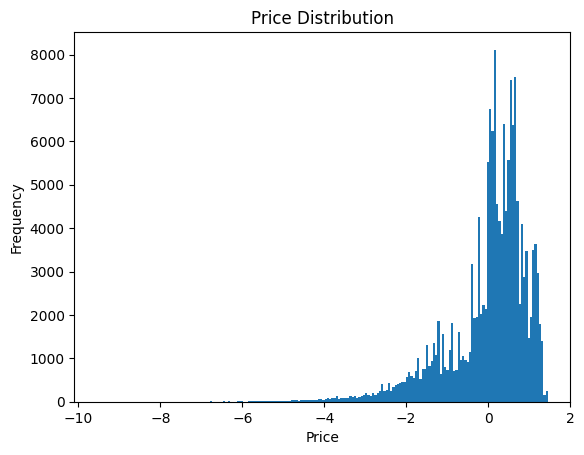

In [55]:

# Make predictions
y_pred = model.predict(X_test) * np.sqrt(variance_value) + mean_value

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

column_names = ct.get_feature_names_out(input_features=X_train.columns)

# Get the coefficients
coefficients = model.named_steps['regressor'].coef_

# Combine the coefficients and feature names into a DataFrame
pairs = list(zip(column_names, coefficients))
pairs.sort(key=lambda x: -abs(x[1]))

# Print the coefficients and feature names
print(*pairs, sep='\n')
# losses = [
# 12671871.51687983,
# 11599001.976823306,
# 11499021.088191919,
# 11528491.053703316,
# 11495207.854229154,
# 11483366.14359929,
# 11212021.177350873
# ]
# losses.append(mse)
# plt.plot(range(len(losses)), losses)
# plt.show()
to_plot = (mean_value - df['price']) / np.sqrt(variance_value)
to_plot.plot(kind='hist', bins=200)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [56]:
for pair in zip(y_test, y_pred):
    print(pair)

(16420, 7713.9401802044695)
(4413, 7231.123451836954)
(5500, 6871.087219418168)
(7424, 5849.79477631305)
(10983, 5132.01211317345)
(3467, 4187.243270425064)
(5955, 5924.629156178141)
(7076, 8083.744461388026)
(4732, 7512.671794516311)
(5539, 9881.28506092717)
(7424, 6087.65533636503)
(4728, 7562.570252805107)
(5507, 6099.657609244246)
(5102, 7497.841973152415)
(5346, 7692.2989124888045)
(5177, 6122.180440268512)
(1105, 5847.984821947569)
(7412, 5842.032306176183)
(2124, 5725.146316263611)
(5102, 7595.300450959816)
(6300, 9653.817195151076)
(4367, 5946.670339670866)
(6200, 7306.059717884875)
(9664, 9937.525653647434)
(6892, 8095.771115549119)
(5177, 3596.7962050424076)
(12557, 7751.132505993854)
(11319, 7592.287181672249)
(2124, 3624.949800224577)
(3478, 7640.881516111614)
(3999, 3614.767751517848)
(6133, 8180.1779199165585)
(11448, 7467.09061656084)
(3971, 7605.862148211583)
(10721, 8469.102092683355)
(7164, 7993.512431349441)
(7021, 7548.25845745485)
(7900, 7149.898373274012)
(2482, 5